In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir("../scripts")
from utilities.print_utilities import capitalized_spaced

In [2]:
# read the top 100 merchants to see trends
top_100_df = pd.read_csv('../models/top-100-merchants.csv', index_col=0)
top_100_df.head()

,merchant_abn,name,tags,tag,numd_sa2_code,returning_customers,unique_customers,median_weekly_income,commission_avg_tot_dollar_value_monthly,avg_num_order_id_monthly,...,minmax_returning_customers,minmax_unique_customers,minmax_median_weekly_income,minmax_commission_avg_tot_dollar_value_monthly,minmax_avg_num_order_id_monthly,minmax_avg_discounted_value,minmax_stddev_tot_dollar_value_monthly,minmax_rate_fraud_order,minmax_stddev_tot_discounted_value_daily,average_rank
rank,,,,,,,,,,,,,,,,,,,,,
1,49891706470,Non Vestibulum Industries,"((teNt and awning shops), (a), (take rate: 5.80))",tent and awning shops,2222.0,24037.0,24078.0,815.703894,19807.260486,11786.952381,...,0.001288,0.000125,0.949333,0.333000,0.139010,0.989872,0.736454,0.012217,0.531271,0.369257
2,63290521567,Vehicula Pellentesque Corporation,"((artist supply and craft shops), (a), (take r...",artist supply and craft shops,2222.0,23346.0,24058.0,815.663697,13544.646461,8015.666667,...,0.029998,0.000955,0.949344,0.543891,0.414487,0.991384,0.454313,0.011242,0.341656,0.373727
3,45629217853,Lacus Consulting,"[[gift, Card, novelty, and souvenir shops], [a...","gift, card, novelty, and souvenir shops",2222.0,23944.0,24080.0,815.679442,27867.742923,10317.761905,...,0.005152,0.000042,0.949340,0.061567,0.246329,0.984823,0.878715,0.016873,0.655372,0.379821
4,89726005175,Est Nunc Consulting,"((tent and awning shops), (a), (take rate: 6.01))",tent and awning shops,2222.0,23930.0,24079.0,815.688162,25495.901715,10280.428571,...,0.005734,0.000083,0.949338,0.141438,0.249056,0.983478,0.917480,0.018450,0.666423,0.393148
5,64203420245,Pede Nonummy Corp.,"((tent and awning shops), (c), (take rate: 2.86))",tent and awning shops,2222.0,24055.0,24081.0,815.686432,10281.625409,12418.095238,...,0.000540,0.000000,0.949338,0.653771,0.092908,0.989884,0.776352,0.012593,0.556897,0.403228


In [3]:
top_100_df.columns

Index(['merchant_abn', 'name', 'tags', 'tag', 'numd_sa2_code',
       'returning_customers', 'unique_customers', 'median_weekly_income',
       'commission_avg_tot_dollar_value_monthly', 'avg_num_order_id_monthly',
       'avg_discounted_value', 'stddev_tot_dollar_value_monthly',
       'rate_fraud_order', 'stddev_tot_discounted_value_daily',
       'minmax_numd_sa2_code', 'minmax_returning_customers',
       'minmax_unique_customers', 'minmax_median_weekly_income',
       'minmax_commission_avg_tot_dollar_value_monthly',
       'minmax_avg_num_order_id_monthly', 'minmax_avg_discounted_value',
       'minmax_stddev_tot_dollar_value_monthly', 'minmax_rate_fraud_order',
       'minmax_stddev_tot_discounted_value_daily', 'average_rank'],
      dtype='object')

In [13]:
def plot_metric_vs_rank(df: pd.DataFrame, metric: str, minmax: bool = False):
    
    colname = f"{'minmax_' if minmax else ''}{metric}"
    axisname = f"{capitalized_spaced(metric)}{' (min-max scaled)' if minmax else ''}"
    plt.figure(figsize=(12, 6))
    rev_v_month_plt = sns.lineplot(
        x = 'rank', 
        y = colname,
        color='#234a55',
        data = df
    )

    # ax.xaxis.set_tick_params(labelsize=30)
    # ax.yaxis.set_tick_params(labelsize=30)
    # ax.set_ylabel('Discounted Average Daily Revenue ($)', fontsize=30)
    # ax.set_xlabel('Rank', fontsize=30)
    # ax.spines['right'].set_visible(False)
    # ax.spines['top'].set_visible(False)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Rank', fontsize=20)
    plt.ylabel(axisname, fontsize=20)
    # plt.title(f'How {axisname} changes over our top 100 merchants')
    # plt.xticks(rotation=60, ha='right')
    plt.yticks(rotation=0)
    plt.legend().set_visible(False)
    rev_v_month_plt.figure.savefig(f'../plots/{colname}-vs-rank.png', 
            bbox_inches = 'tight', dpi = 500)

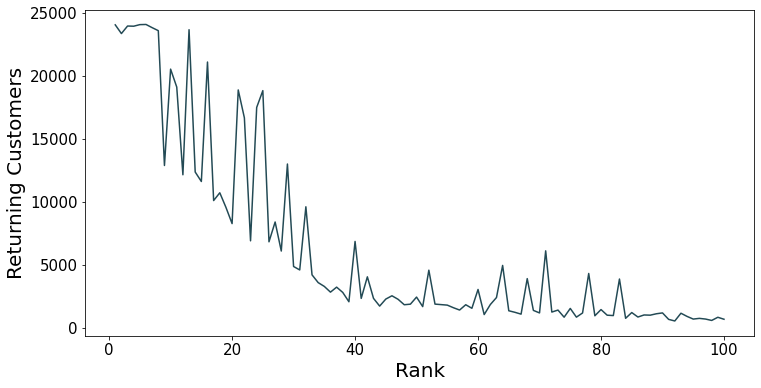

In [14]:
plot_metric_vs_rank(top_100_df, 'returning_customers')

/tmp/ipykernel_11784/3974432245.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12, 6))


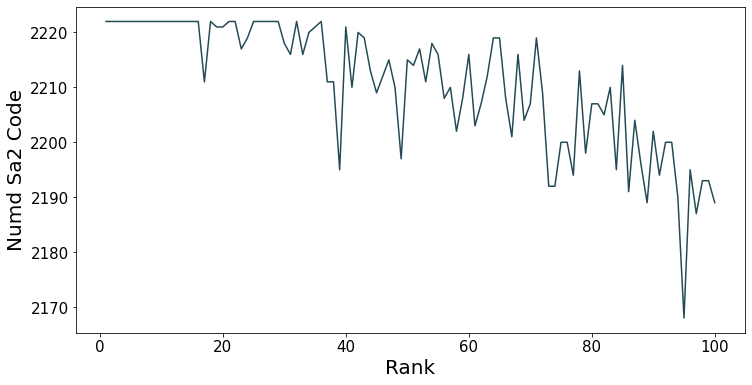

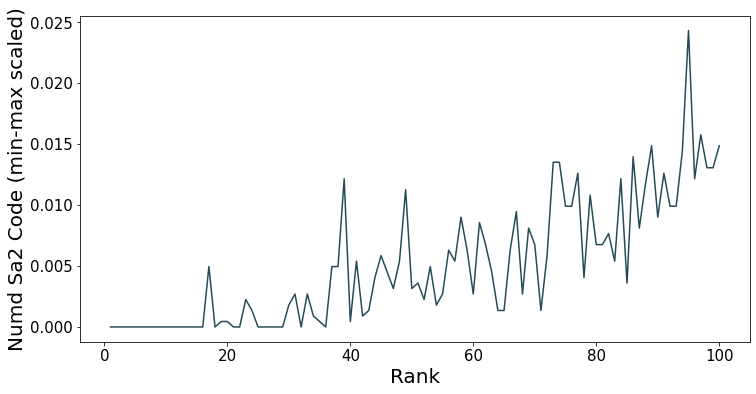

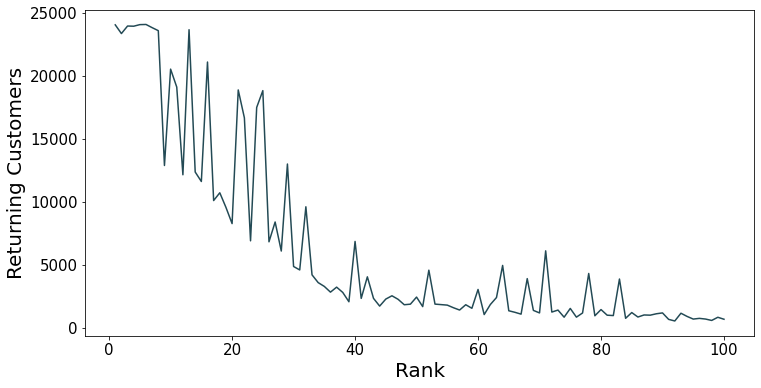

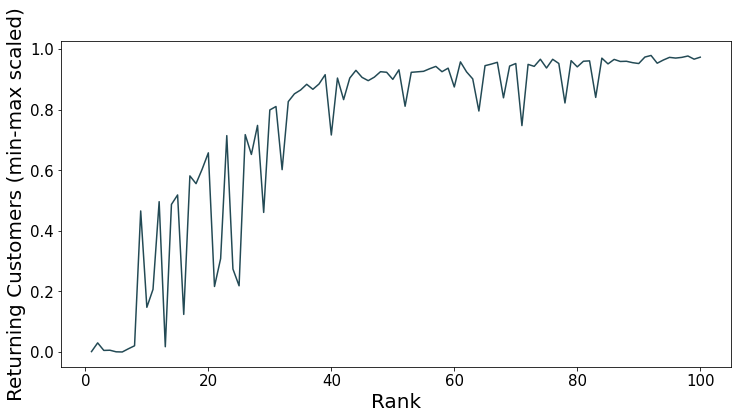

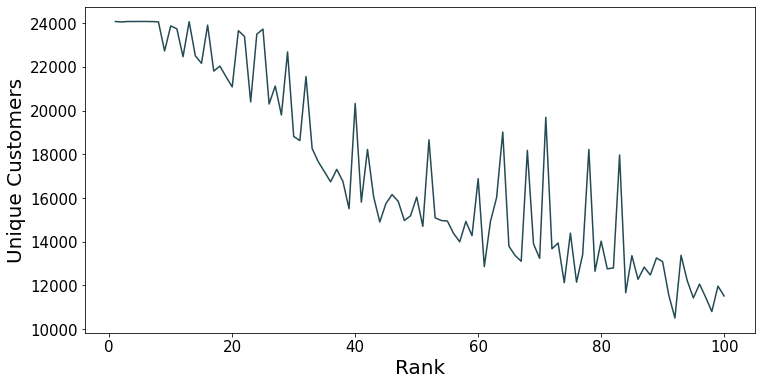

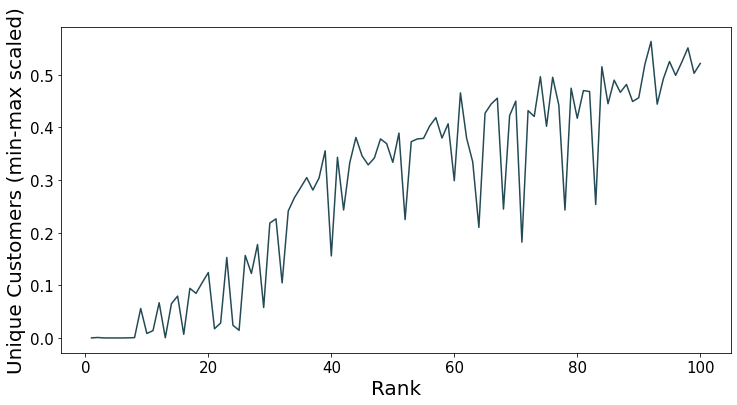

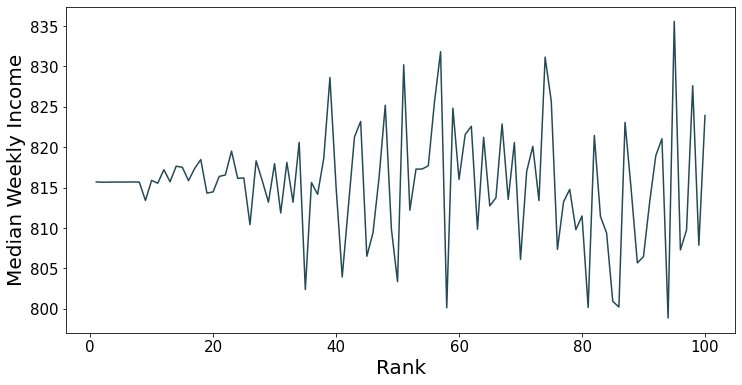

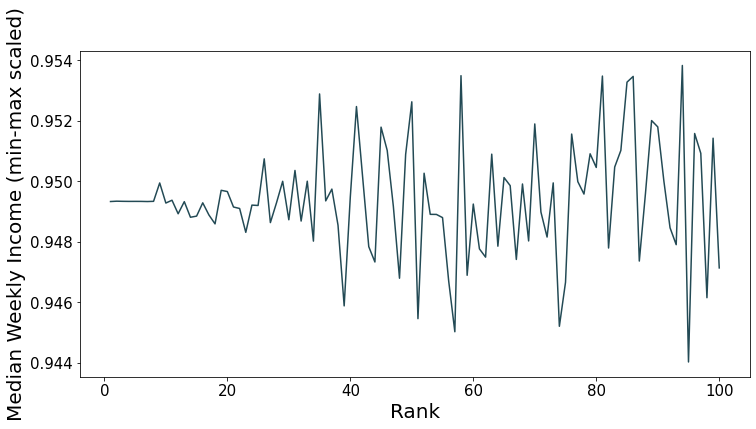

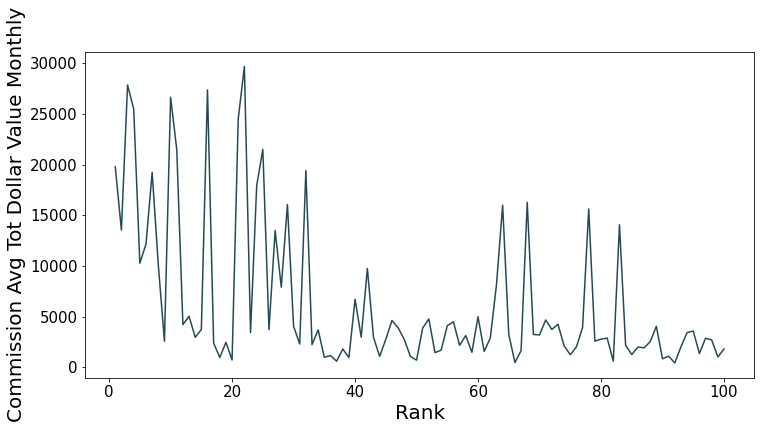

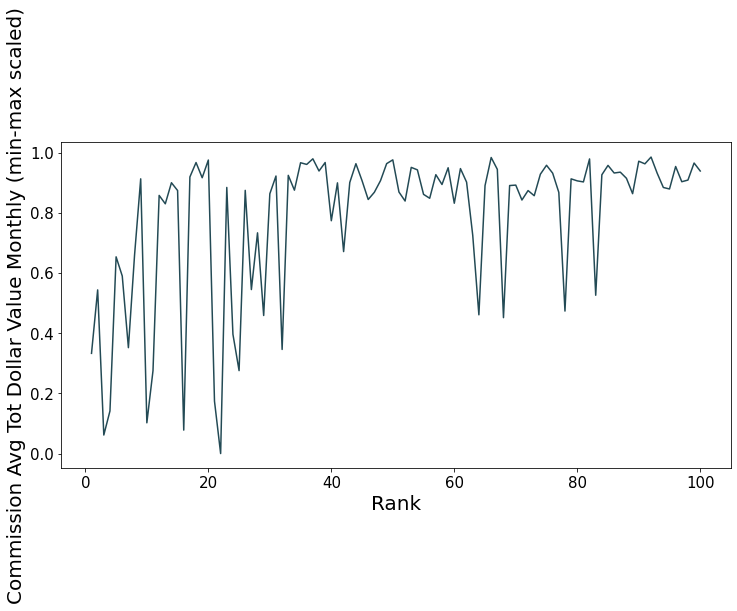

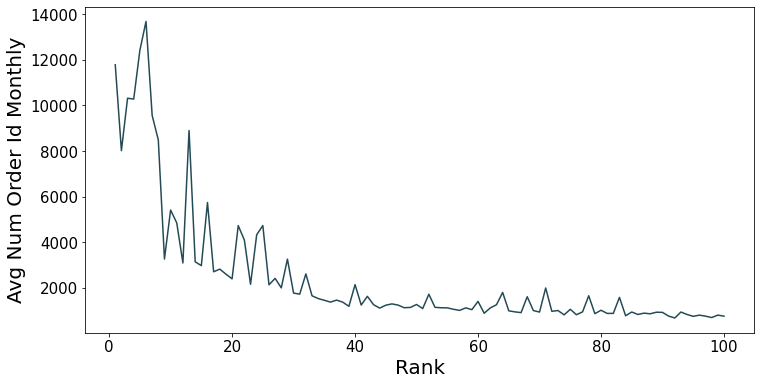

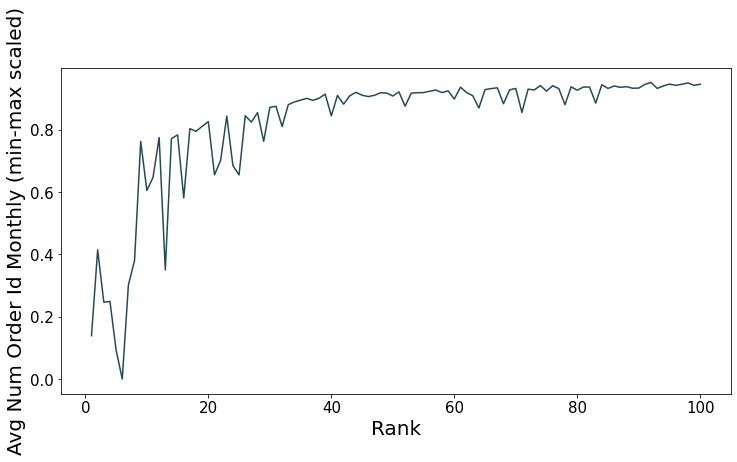

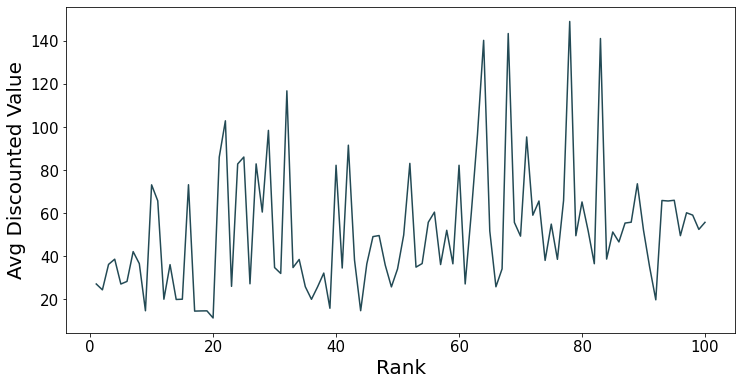

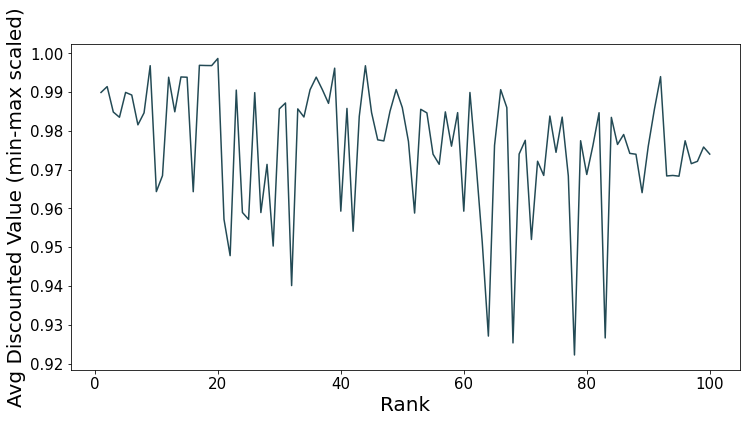

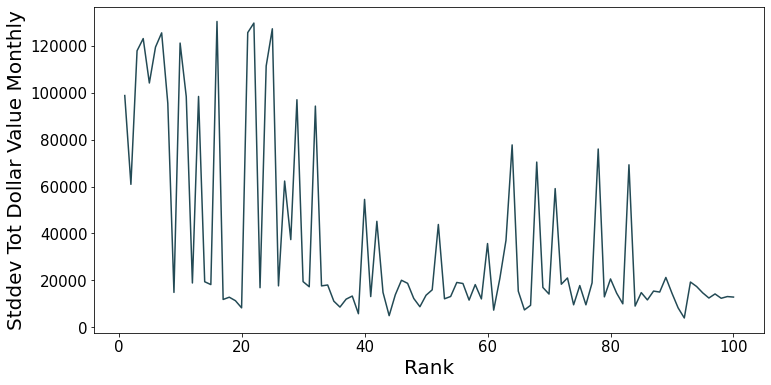

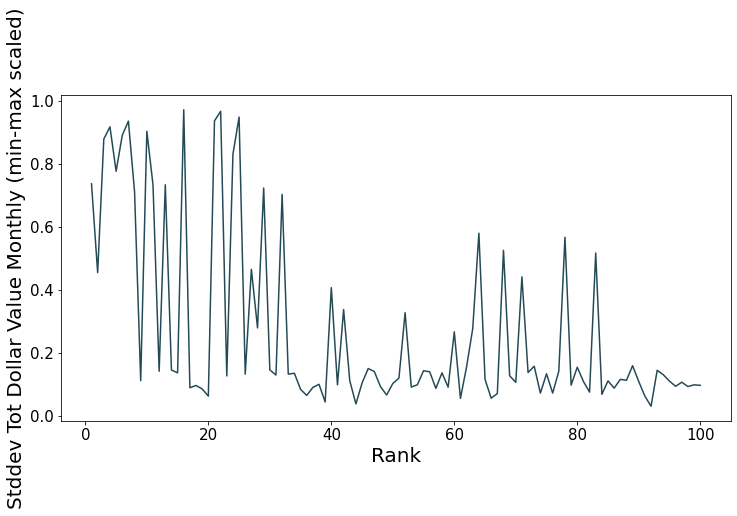

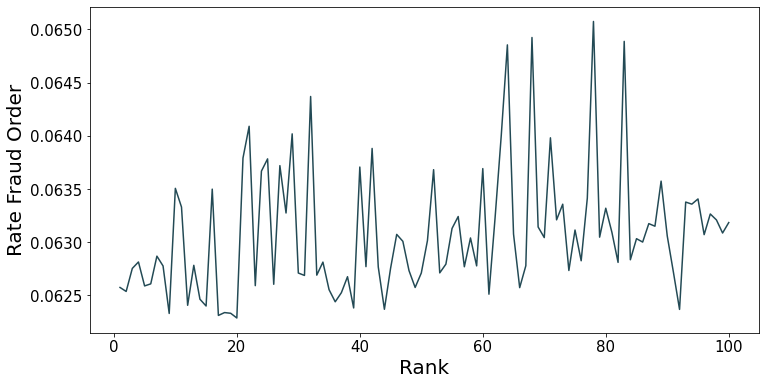

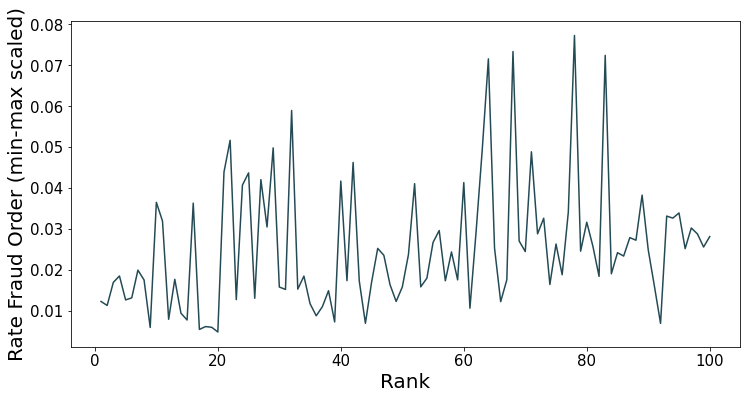

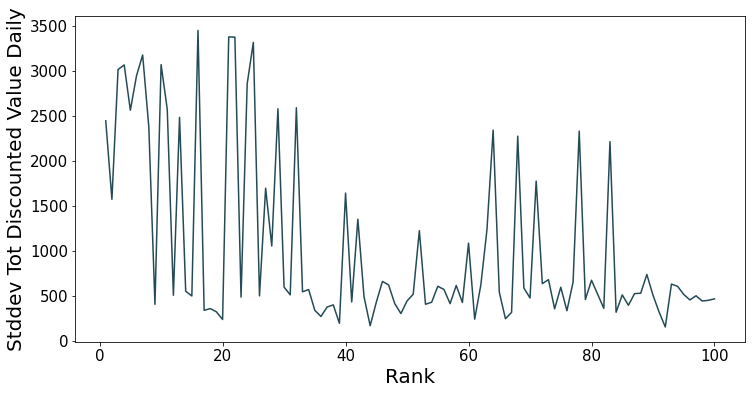

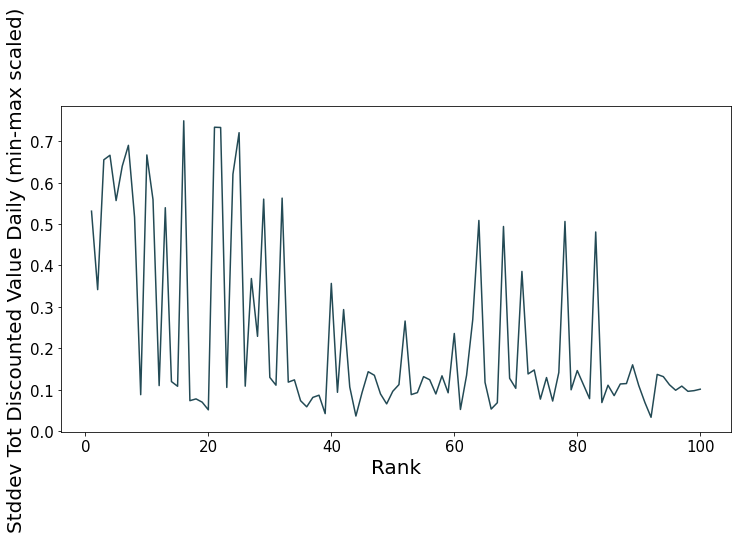

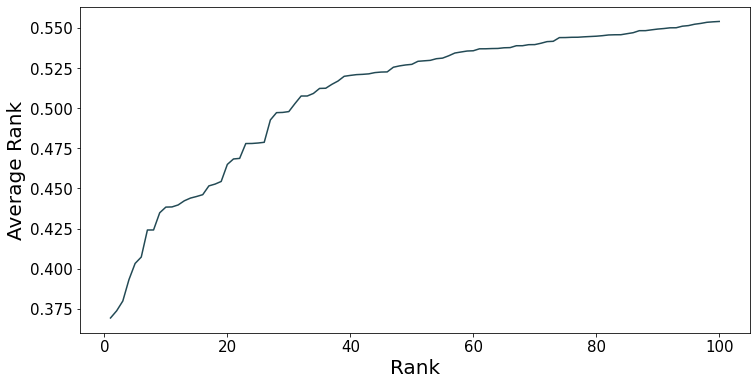

In [15]:
for colname in top_100_df.columns:
    if colname[:6] == 'minmax': continue
    if colname in ['merchant_abn', 'name', 'tags', 'tag', 'average_rank']: continue

    plot_metric_vs_rank(top_100_df, colname)
    plot_metric_vs_rank(top_100_df, colname, minmax = True)

plot_metric_vs_rank(top_100_df, 'average_rank')